# Training dataset.csv to #

In [80]:
#importing the essential libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
from fast_ml.feature_selection import get_constant_features
import plotly.express as px

In [2]:
#we will load the dataset into a dataframe named df.
df = pd.read_csv('dataset_for_ML_Model.csv')

In [3]:
#identifying constantfeatures and dropping  them.
constant_features = get_constant_features(df)
confeat = constant_features['Var'].tolist()
df.drop(columns=confeat,axis=1,inplace=True)

In [4]:
#displaying the first 5 rows of the dataframe.
df.head()

business_code cust_number       name_customer           clear_date  \
0          U001  0200769623        WAL-MAR corp  2020-02-11 00:00:00   
1          U001  0200980828              BEN E   2019-08-08 00:00:00   
2          U001  0200792734          MDV/ trust  2019-12-30 00:00:00   
3          CA02  0140105686            SYSC llc                  NaN   
4          U001  0200769623  WAL-MAR foundation  2019-11-25 00:00:00   

   buisness_year        doc_id posting_date  document_create_date  \
0         2020.0  1.930438e+09   2020-01-26              20200125   
1         2019.0  1.929646e+09   2019-07-22              20190722   
2         2019.0  1.929874e+09   2019-09-14              20190914   
3         2020.0  2.960623e+09   2020-03-30              20200330   
4         2019.0  1.930148e+09   2019-11-13              20191113   

   document_create_date.1  due_in_date invoice_currency  total_open_amount  \
0                20200126   20200210.0              USD           54273.28   
1                20190722   20190811.0              USD           79656.60   
2                20190914   20190929.0              USD            2253.86   
3                20200330   20200410.0              CAD            3299.70   
4                20191113   20191128.0              USD           33133.29   

   baseline_create_date cust_payment_terms    invoice_id  isOpen  
0            20200126.0               NAH4  1.930438e+09       0  
1            20190722.0               NAD1  1.929646e+09       0  
2            20190914.0               NAA8  1.929874e+09       0  
3            20200331.0               CA10  2.960623e+09       1  
4            20191113.0               NAH4  1.930148e+09       0

# Conversion to DateTime Datatype:

In [5]:
df['posting_date']= pd.to_datetime(df['posting_date']) 
df['document_create_date']= pd.to_datetime(df['document_create_date'], format="%Y%m%d", errors="coerce") 
df['document_create_date.1']= pd.to_datetime(df['document_create_date.1'], format="%Y%m%d", errors="coerce") 
df['due_in_date']= pd.to_datetime(df['due_in_date'], format="%Y%m%d", errors="coerce") 
df['baseline_create_date']= pd.to_datetime(df['baseline_create_date'], format="%Y%m%d") 
#df['clear_date']= pd.to_datetime(df['clear_date'], format='%Y-%m-%d %H:%M:%S').dt.date
df['clear_date'] = pd.to_datetime(df['clear_date'], format='%Y-%m-%d %H:%M:%S')

In [6]:
df.head()

business_code cust_number       name_customer clear_date  buisness_year  \
0          U001  0200769623        WAL-MAR corp 2020-02-11         2020.0   
1          U001  0200980828              BEN E  2019-08-08         2019.0   
2          U001  0200792734          MDV/ trust 2019-12-30         2019.0   
3          CA02  0140105686            SYSC llc        NaT         2020.0   
4          U001  0200769623  WAL-MAR foundation 2019-11-25         2019.0   

         doc_id posting_date document_create_date document_create_date.1  \
0  1.930438e+09   2020-01-26           2020-01-25             2020-01-26   
1  1.929646e+09   2019-07-22           2019-07-22             2019-07-22   
2  1.929874e+09   2019-09-14           2019-09-14             2019-09-14   
3  2.960623e+09   2020-03-30           2020-03-30             2020-03-30   
4  1.930148e+09   2019-11-13           2019-11-13             2019-11-13   

  due_in_date invoice_currency  total_open_amount baseline_create_date  \
0  2020-02-10              USD           54273.28           2020-01-26   
1  2019-08-11              USD           79656.60           2019-07-22   
2  2019-09-29              USD            2253.86           2019-09-14   
3  2020-04-10              CAD            3299.70           2020-03-31   
4  2019-11-28              USD           33133.29           2019-11-13   

  cust_payment_terms    invoice_id  isOpen  
0               NAH4  1.930438e+09       0  
1               NAD1  1.929646e+09       0  
2               NAA8  1.929874e+09       0  
3               CA10  2.960623e+09       1  
4               NAH4  1.930148e+09       0

In [7]:
df[['due_in_date','clear_date']].head()

due_in_date clear_date
0  2020-02-10 2020-02-11
1  2019-08-11 2019-08-08
2  2019-09-29 2019-12-30
3  2020-04-10        NaT
4  2019-11-28 2019-11-25

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              40000 non-null  datetime64[ns]
 4   buisness_year           50000 non-null  float64       
 5   doc_id                  50000 non-null  float64       
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date    50000 non-null  datetime64[ns]
 8   document_create_date.1  50000 non-null  datetime64[ns]
 9   due_in_date             50000 non-null  datetime64[ns]
 10  invoice_currency        50000 non-null  object        
 11  total_open_amount       50000 non-null  float64       
 12  baseline_create_date    50000 non-null  dateti

In [9]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

In [10]:
#we use the mean() method to visualize the percentage of missing data.
df.isnull().mean()

business_code             0.00000
cust_number               0.00000
name_customer             0.00000
clear_date                0.20000
buisness_year             0.00000
doc_id                    0.00000
posting_date              0.00000
document_create_date      0.00000
document_create_date.1    0.00000
due_in_date               0.00000
invoice_currency          0.00000
total_open_amount         0.00000
baseline_create_date      0.00000
cust_payment_terms        0.00000
invoice_id                0.00012
isOpen                    0.00000
dtype: float64

In [11]:
df.head()

business_code cust_number       name_customer clear_date  buisness_year  \
0          U001  0200769623        WAL-MAR corp 2020-02-11         2020.0   
1          U001  0200980828              BEN E  2019-08-08         2019.0   
2          U001  0200792734          MDV/ trust 2019-12-30         2019.0   
3          CA02  0140105686            SYSC llc        NaT         2020.0   
4          U001  0200769623  WAL-MAR foundation 2019-11-25         2019.0   

         doc_id posting_date document_create_date document_create_date.1  \
0  1.930438e+09   2020-01-26           2020-01-25             2020-01-26   
1  1.929646e+09   2019-07-22           2019-07-22             2019-07-22   
2  1.929874e+09   2019-09-14           2019-09-14             2019-09-14   
3  2.960623e+09   2020-03-30           2020-03-30             2020-03-30   
4  1.930148e+09   2019-11-13           2019-11-13             2019-11-13   

  due_in_date invoice_currency  total_open_amount baseline_create_date  \
0  2020-02-10              USD           54273.28           2020-01-26   
1  2019-08-11              USD           79656.60           2019-07-22   
2  2019-09-29              USD            2253.86           2019-09-14   
3  2020-04-10              CAD            3299.70           2020-03-31   
4  2019-11-28              USD           33133.29           2019-11-13   

  cust_payment_terms    invoice_id  isOpen  
0               NAH4  1.930438e+09       0  
1               NAD1  1.929646e+09       0  
2               NAA8  1.929874e+09       0  
3               CA10  2.960623e+09       1  
4               NAH4  1.930148e+09       0

# Train And Test Data Splitting


In [12]:
train = df[df['clear_date'].notnull()]
train.head()

business_code cust_number       name_customer clear_date  buisness_year  \
0          U001  0200769623        WAL-MAR corp 2020-02-11         2020.0   
1          U001  0200980828              BEN E  2019-08-08         2019.0   
2          U001  0200792734          MDV/ trust 2019-12-30         2019.0   
4          U001  0200769623  WAL-MAR foundation 2019-11-25         2019.0   
5          CA02  0140106181    THE  corporation 2019-12-04         2019.0   

         doc_id posting_date document_create_date document_create_date.1  \
0  1.930438e+09   2020-01-26           2020-01-25             2020-01-26   
1  1.929646e+09   2019-07-22           2019-07-22             2019-07-22   
2  1.929874e+09   2019-09-14           2019-09-14             2019-09-14   
4  1.930148e+09   2019-11-13           2019-11-13             2019-11-13   
5  2.960581e+09   2019-09-20           2019-09-20             2019-09-20   

  due_in_date invoice_currency  total_open_amount baseline_create_date  \
0  2020-02-10              USD           54273.28           2020-01-26   
1  2019-08-11              USD           79656.60           2019-07-22   
2  2019-09-29              USD            2253.86           2019-09-14   
4  2019-11-28              USD           33133.29           2019-11-13   
5  2019-10-04              CAD           22225.84           2019-09-24   

  cust_payment_terms    invoice_id  isOpen  
0               NAH4  1.930438e+09       0  
1               NAD1  1.929646e+09       0  
2               NAA8  1.929874e+09       0  
4               NAH4  1.930148e+09       0  
5               CA10  2.960581e+09       0

In [13]:
train.shape

(40000, 16)

In [58]:
train['delay'] = (pd.to_datetime(train['clear_date'])- pd.to_datetime(train['posting_date'])).dt.days

In [59]:
test = df[df['clear_date'].isnull()]
test.head()

business_code cust_number     name_customer clear_date  buisness_year  \
3           CA02  0140105686          SYSC llc        NaT         2020.0   
7           U001  0200744019           TARG us        NaT         2020.0   
10          U001  0200418007               AM         NaT         2020.0   
14          U001  0200739534        OK systems        NaT         2020.0   
15          U001  0200353024  DECA corporation        NaT         2020.0   

          doc_id posting_date document_create_date document_create_date.1  \
3   2.960623e+09   2020-03-30           2020-03-30             2020-03-30   
7   1.930659e+09   2020-03-19           2020-03-18             2020-03-19   
10  1.930611e+09   2020-03-11           2020-03-06             2020-03-11   
14  1.930788e+09   2020-04-15           2020-04-15             2020-04-15   
15  1.930817e+09   2020-04-23           2020-04-23             2020-04-23   

   due_in_date invoice_currency  total_open_amount baseline_create_date  \
3   2020-04-10              CAD            3299.70           2020-03-31   
7   2020-04-03              USD           11173.02           2020-03-19   
10  2020-03-26              USD            3525.59           2020-03-11   
14  2020-04-30              USD          121105.65           2020-04-15   
15  2020-04-26              USD            3726.06           2020-04-16   

   cust_payment_terms    invoice_id  isOpen  
3                CA10  2.960623e+09       1  
7                NAA8  1.930659e+09       1  
10               NAA8  1.930611e+09       1  
14               NAA8  1.930788e+09       1  
15               NAM2  1.930817e+09       1

In [60]:
test.shape

(10000, 16)

# Data Preprocessing

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           40000 non-null  object        
 1   cust_number             40000 non-null  object        
 2   name_customer           40000 non-null  object        
 3   clear_date              40000 non-null  datetime64[ns]
 4   buisness_year           40000 non-null  float64       
 5   doc_id                  40000 non-null  float64       
 6   posting_date            40000 non-null  datetime64[ns]
 7   document_create_date    40000 non-null  datetime64[ns]
 8   document_create_date.1  40000 non-null  datetime64[ns]
 9   due_in_date             40000 non-null  datetime64[ns]
 10  invoice_currency        40000 non-null  object        
 11  total_open_amount       40000 non-null  float64       
 12  baseline_create_date    40000 non-null  dateti

In [62]:
train.nunique()

business_code                 6
cust_number                1344
name_customer              3889
clear_date                  403
buisness_year                 2
doc_id                    39158
posting_date                424
document_create_date        427
document_create_date.1      424
due_in_date                 491
invoice_currency              2
total_open_amount         35664
baseline_create_date        431
cust_payment_terms           70
invoice_id                39152
delay                       145
dtype: int64

In [63]:
#now since isOpen has only one value we need to drop it.
train.drop(['isOpen'], axis=1, inplace=True)

KeyError: "['isOpen'] not found in axis"

In [64]:
train.isnull().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                6
delay                     0
dtype: int64

In [65]:
#indetifying quasi constant features and use threshold to determine whether to drop them or not.
quasi_constant_features = get_constant_features(df,threshold=0.99,dropna=False)
qconfeat = quasi_constant_features['Var'].tolist()
train.drop(columns=qconfeat,axis=1,inplace=True)

# EDA 


(array([3.4255e+04, 4.6630e+03, 8.7100e+02, 1.1500e+02, 6.6000e+01,
        1.9000e+01, 5.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([7.90000000e-01, 6.68600470e+04, 1.33719304e+05, 2.00578561e+05,
        2.67437818e+05, 3.34297075e+05, 4.01156332e+05, 4.68015589e+05,
        5.34874846e+05, 6.01734103e+05, 6.68593360e+05]),
 <BarContainer object of 10 artists>)

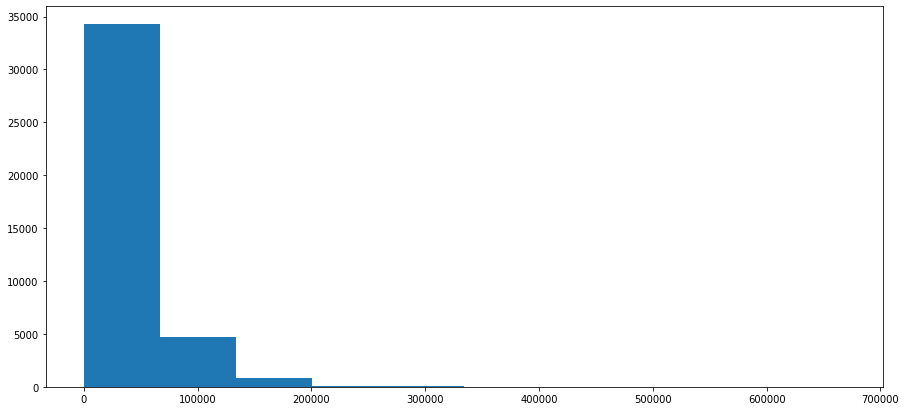

In [66]:
plt.subplots(figsize=(15,7))
plt.hist(train['total_open_amount'])

(array([3.3001e+04, 3.7030e+03, 1.4260e+03, 1.3360e+03, 3.0100e+02,
        1.3100e+02, 5.0000e+01, 2.0000e+01, 1.8000e+01, 1.4000e+01]),
 array([ 0. ,  6.9, 13.8, 20.7, 27.6, 34.5, 41.4, 48.3, 55.2, 62.1, 69. ]),
 <BarContainer object of 10 artists>)

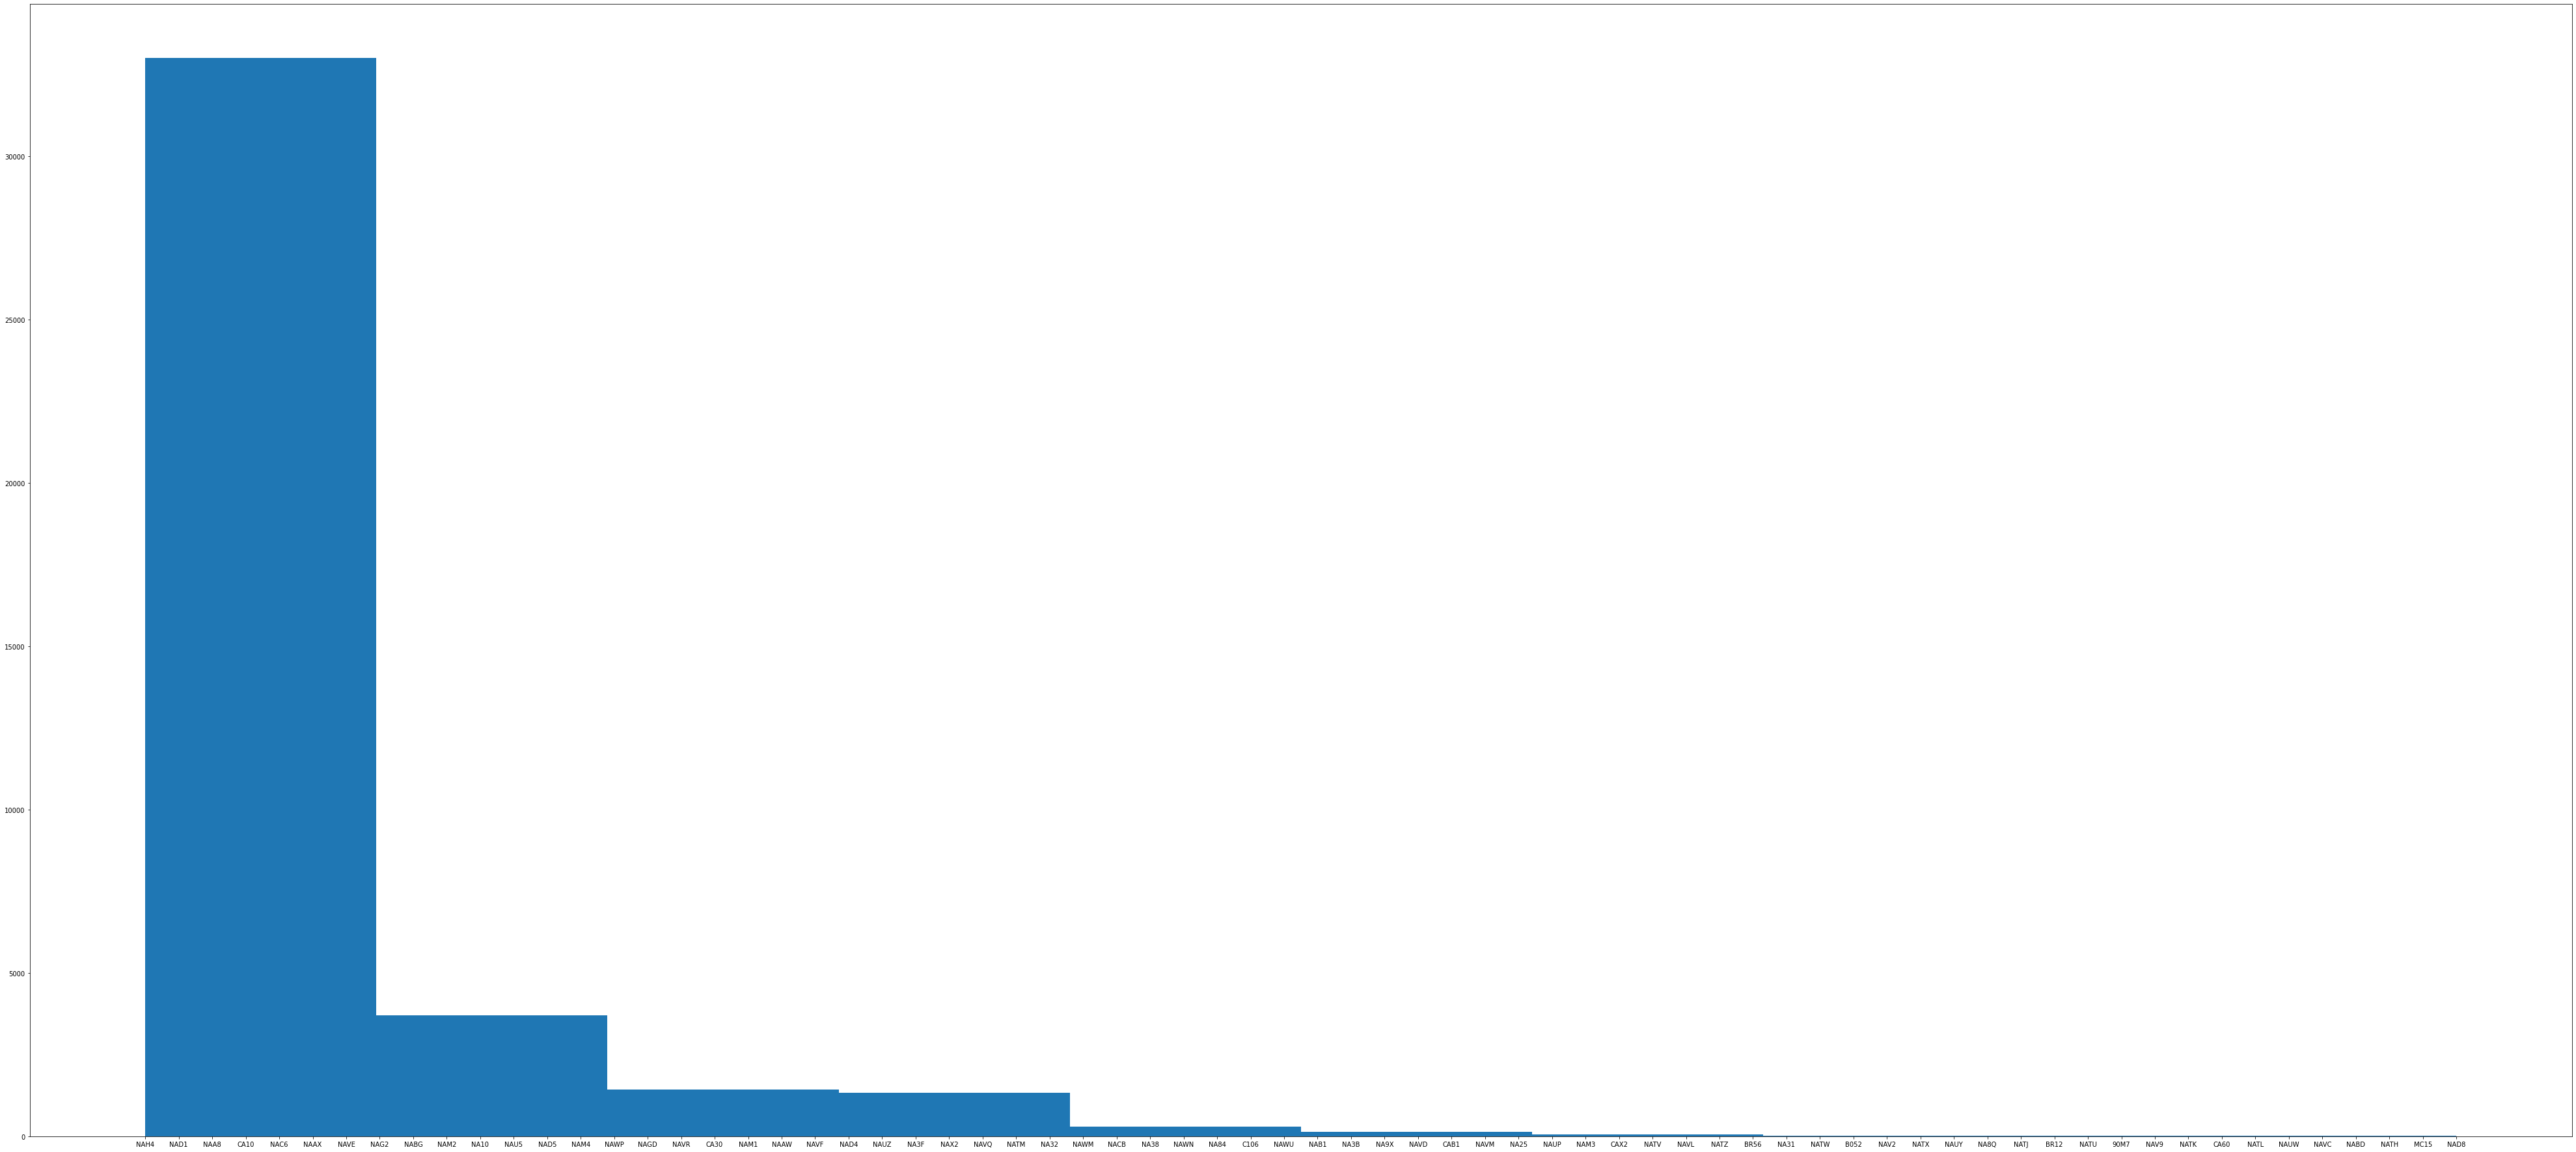

In [67]:
plt.subplots(figsize=(70,32))
plt.hist(train['cust_payment_terms'])

<AxesSubplot:xlabel='posting_date', ylabel='due_in_date'>

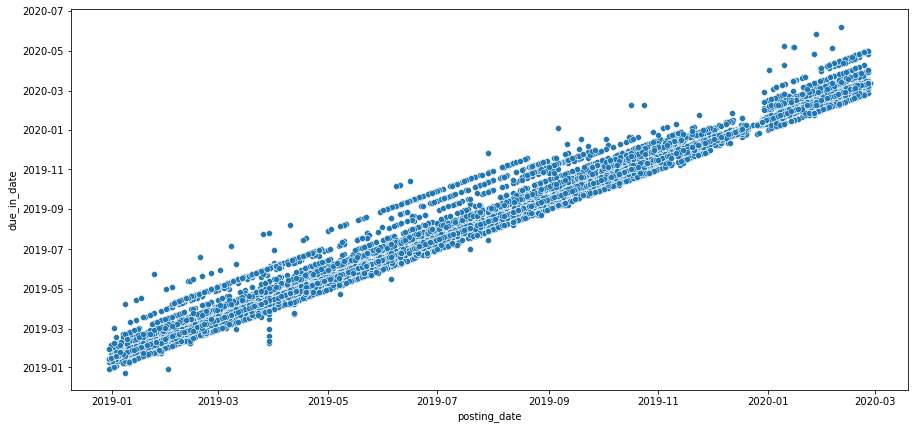

In [68]:
plt.subplots(figsize=(15,7))
sns.scatterplot(x='posting_date', y='due_in_date', data=train)

<AxesSubplot:xlabel='posting_date', ylabel='clear_date'>

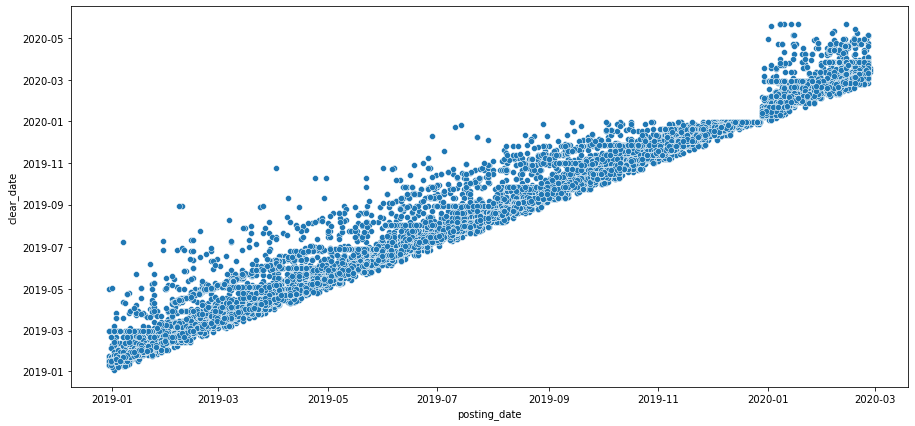

In [69]:
plt.subplots(figsize=(15,7))
sns.scatterplot(x='posting_date', y='clear_date', data=train)

<AxesSubplot:xlabel='clear_date', ylabel='due_in_date'>

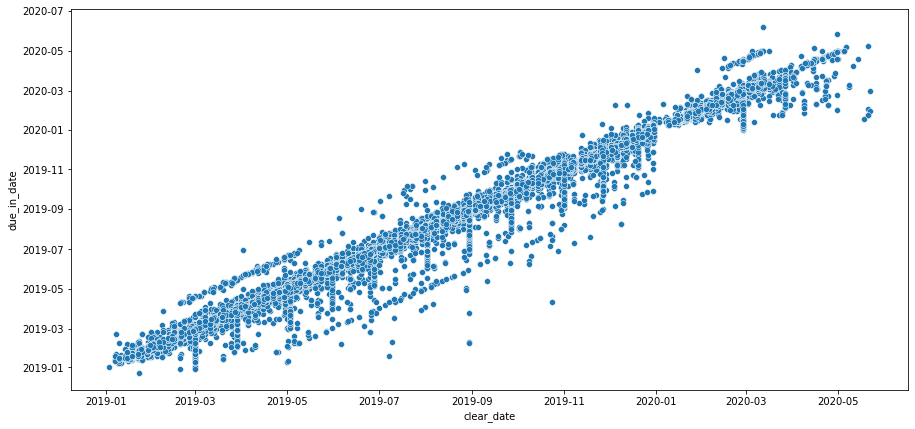

In [70]:
plt.subplots(figsize=(15,7))
sns.scatterplot(x='clear_date', y='due_in_date', data=train)

In [89]:
px.box(train['total_open_amount'])

In [91]:
px.box(train['delay'])

<AxesSubplot:xlabel='delay', ylabel='Density'>

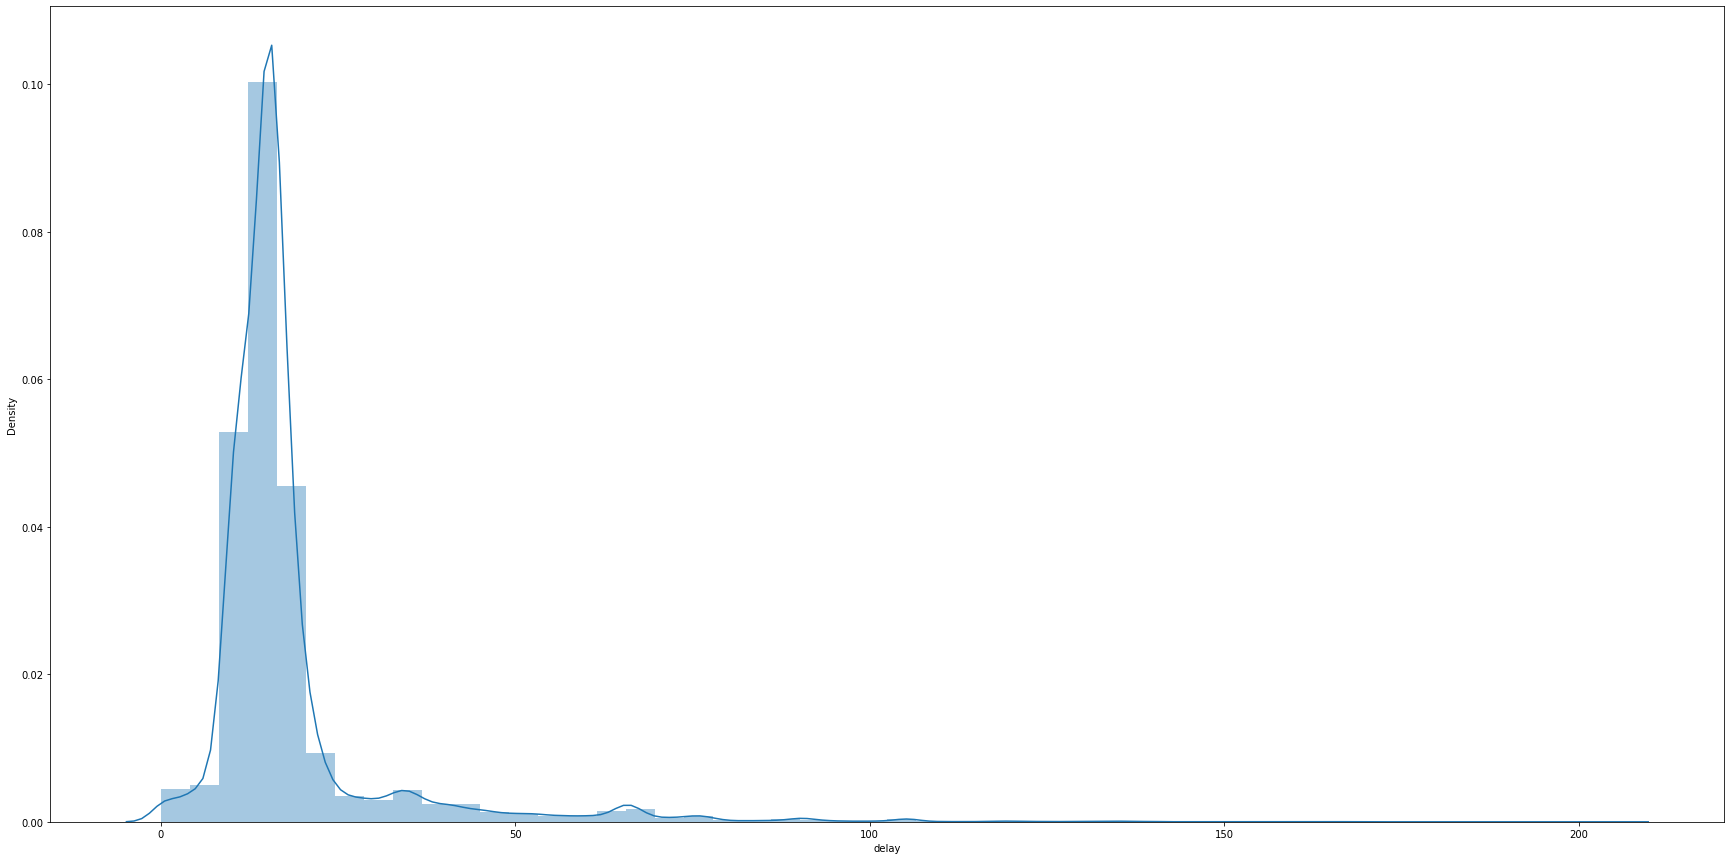

In [97]:
plt.subplots(figsize=(30,15))
sns.distplot(train['delay'])

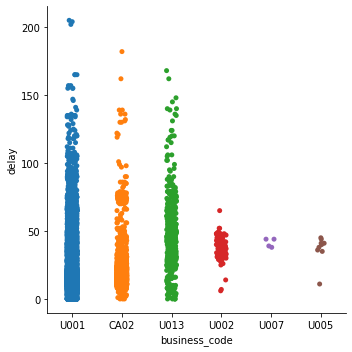

In [107]:
sns.catplot(y="delay", x="business_code", data=train)

In [114]:
train['invoice_currency'].value_counts()

USD    36818
CAD     3182
Name: invoice_currency, dtype: int64

<AxesSubplot:xlabel='invoice_currency', ylabel='count'>

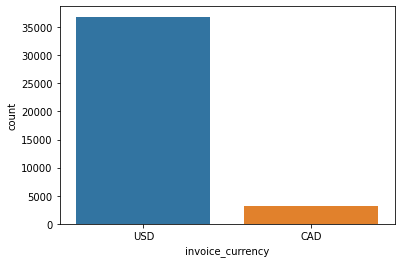

In [117]:
#checking the invoice currency column.
sns.countplot(train['invoice_currency'])

In [118]:
train['business_code'].value_counts()

U001    36190
CA02     3180
U013      501
U002      116
U005        9
U007        4
Name: business_code, dtype: int64

<AxesSubplot:xlabel='business_code', ylabel='count'>

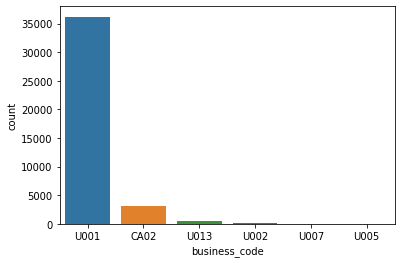

In [119]:
#We are counting the number of observations in business_code column.
sns.countplot(train['business_code'])

In [120]:
train['buisness_year'].value_counts()

2019.0    34715
2020.0     5285
Name: buisness_year, dtype: int64

<AxesSubplot:xlabel='buisness_year', ylabel='count'>

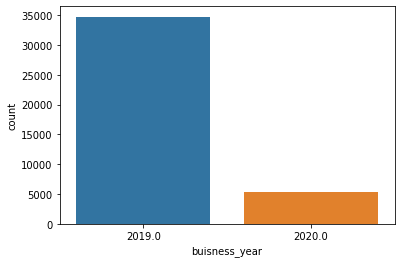

In [121]:
sns.countplot(train['buisness_year'])

In [ ]:
train['cust_payment_terms'].unique()

In [ ]:
sns.distplot(train['clear_date'])

In [ ]:
train['clear_date'].head()

In [ ]:
sns.lineplot(data = train)

In [ ]:
#Here we use barplot funtion to draw a graph with the amt. yet to be paid for that invoice vs company code of that account.
plt.subplots(figsize=(15,7))
sns.barplot(x='business_code', y='total_open_amount',data=train)

In [ ]:
#Histogram to repesent the amt. yet to be paid for that invoice vs count.
plt.subplots(figsize=(15,7))
sns.histplot(train['total_open_amount'])